In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import openpyxl
import xlsxwriter
import statsmodels.api as sm
from random import randint
from scipy.optimize import curve_fit


current_path = os.getcwd()
print(current_path)

/Users/abasaltbahrami/Library/CloudStorage/Box-Box/VisualStudio/MF_Cell_Analysis


In [185]:
# loading data

xls = pd.ExcelFile(r'I2A_90min_120min_150min_180min_AII_AR_HRP_main.xls')
cols = ['SMF', 'neg']

df90 = pd.read_excel(xls, xls.sheet_names[0], usecols=cols)
df120 = pd.read_excel(xls, xls.sheet_names[1], usecols=cols)
df150 = pd.read_excel(xls, xls.sheet_names[2], usecols=cols)
df180 = pd.read_excel(xls, xls.sheet_names[3], usecols=cols)

/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


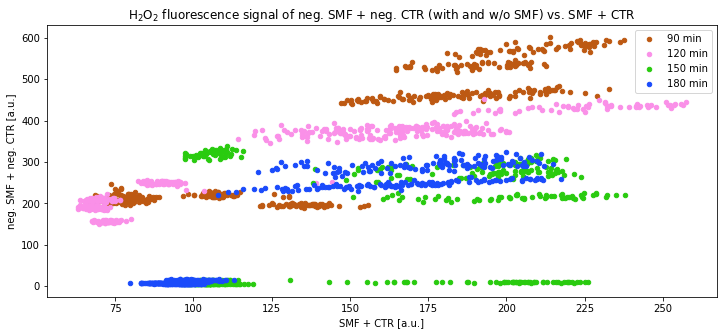

In [186]:
# Plotting all negative data vs. experimental data with and withut magnetic field 

colors = []
for i in range(len(xls.sheet_names)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

    
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
    
i = 0
while i < 4:
    df = pd.read_excel(xls, sheet_name=xls.sheet_names[i], usecols=cols)
    #df = df.iloc[250:300, :]
    df = df.dropna()
    df.plot.scatter(ax=axes, x='SMF', y='neg', color=colors[i], label=str(90+30*i)+" min")
    i += 1
    
axes.legend()
plt.xlabel('SMF + CTR [a.u.]') 
plt.ylabel('neg. SMF + neg. CTR [a.u.]')
plt.title("H$_{2}$O$_{2}$ fluorescence signal of neg. SMF + neg. CTR (with and w/o SMF) vs. SMF + CTR")
plt.savefig('H2O2_total_FL_signal.png', bbox_inches='tight')
plt.show()


/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


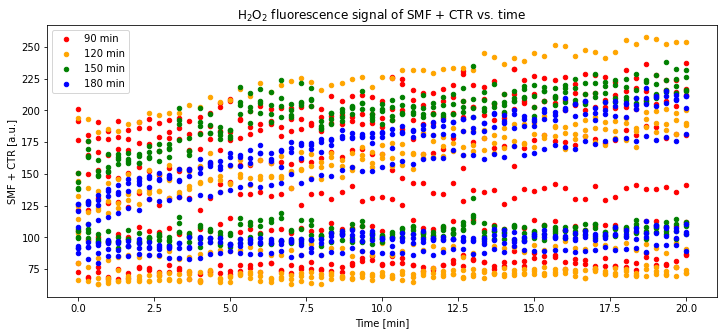

In [187]:
# plotting SMF and CTR within 20 minutes of H2O2 FL measurement
    

data = []
for i in range (0,4,1):
    list = pd.read_excel(xls, xls.sheet_names[i], usecols=cols)['SMF'].dropna()
    data.append(list)

time = []
for i in range(0, len(df90['SMF'].dropna())//8, 1):
    list = i*20/60
    j = 0
    while j < 8:
        time.append(list)
        j += 1

    
colors = ["Red", "Orange", "Green", "Blue"]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

i = 0
while i < 4:
    
    df={'SMF':data[i],'time':time}
    df = pd.DataFrame(data = df);
    df.plot.scatter(ax=axes, x='time', y='SMF', color=colors[i], label=str(90+30*i)+" min")
    i = i+1

axes.legend()
plt.xlabel('Time [min]') 
plt.ylabel('SMF + CTR [a.u.]')
plt.title("H$_{2}$O$_{2}$ fluorescence signal of SMF + CTR vs. time ")
plt.savefig('H2O2_SMF_CTR_FL_signal.png', bbox_inches='tight')
plt.show()

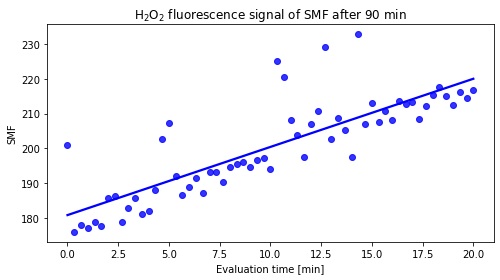

Slope of the linear fit =  0.9906471348196898


In [188]:
# plotting SMF and CTR vs. time and alsom vs. each other

SMF = []
CTR = []

time = []
for i in range(0, len(df90['SMF'].dropna())//8, 1):
    list = i*20/60
    time.append(list)
        
        
for i in range(0, len(df180['SMF'].dropna()), 8):
    listB = df90['SMF'].dropna()
    listB = listB.tolist()[i]
    SMF.append(listB)
    
for i in range(4, len(df180['SMF'].dropna()), 8):
    listB = df90['SMF'].dropna()
    listB = listB.tolist()[i]
    CTR.append(listB)

dict = {'SMF': SMF, 'CTR': CTR, 'Time': time}
df = pd.DataFrame(dict)
df.to_excel('out.xlsx', engine='xlsxwriter') 

                    
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

sns.regplot(ax = axes, x=df['Time'], y=df['SMF'], color="b", ci=None)
plt.title("H$_{2}$O$_{2}$ fluorescence signal of SMF after 90 min")
plt.xlabel('Evaluation time [min]') 
plt.savefig('SMF_time.png', bbox_inches='tight')
plt.show()

# extracting slopes 

slope, intercept, r_value, pv, se = stats.linregress(df['SMF'], df['CTR'])
print("Slope of the linear fit = ", slope)

# Bar plots CTR vs. SMF

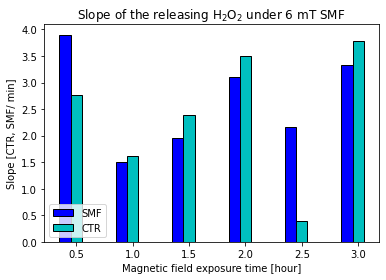

In [189]:
# SMF and CTR vs. time of exposure to the magnetic field

barWidth = 0.2 
 
m_SMF = [3.90, 1.51, 1.95, 3.11, 2.17, 3.33] 
m_CTR = [2.76, 1.62, 2.38, 3.50, 0.39, 3.78] 
  
yer1 = [0, 0, 0, 0, 0, 0] 
yer2 = [0, 0, 0, 0, 0, 0] 
  
r1 = np.arange(len(m_SMF)) 
r2 = [x + barWidth for x in r1] 
  
plt.bar(r1, m_SMF, width = barWidth, color = 'b', edgecolor = 'black', yerr=yer1, capsize=2, label='SMF') 
plt.bar(r2, m_CTR, width = barWidth, color = 'c', edgecolor = 'black', yerr=yer2, capsize=2, label='CTR')  

plt.xticks([r + barWidth for r in range(len(m_SMF))], ['0.5', '1.0', '1.5', '2.0', '2.5', '3.0']) 

plt.xlabel('Magnetic field exposure time [hour]')
plt.ylabel('Slope [CTR, SMF/ min]') 
plt.legend() 
plt.title('Slope of the releasing H$_{2}$O$_{2}$ under 6 mT SMF')
plt.savefig('Slope_CTR_SMF_time.png', bbox_inches='tight')
plt.show()


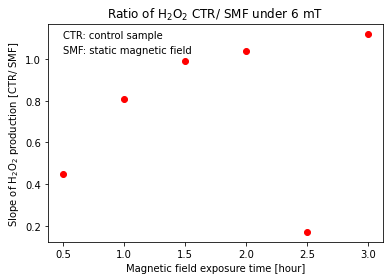

In [190]:
# relations between CTR and SMF

barWidth = 0.2 
 
tempo = ['0.5', '1.0', '1.5', '2.0', '2.5', '3.0'] 
ratio = [0.45, 0.81, 0.99, 1.04, 0.17, 1.12] # CTR/SMF

width = 1/1.5

#def func(x, a, b, c):
#    return a * np.exp(-(x-b)**2/(2*c**2))

#popt, pcov = curve_fit(func, tempo[:], ratio[:])
#x = np.linspace(-0.5, 2.5, 100)
#y = func(x, *popt)


fig, ax = plt.subplots()

plt.scatter(tempo, ratio, color='red')
#plt.plot(x + width/2, y, c='b')
plt.xlabel('Magnetic field exposure time [hour]')
plt.ylabel('Slope of H$_{2}$O$_{2}$ production [CTR/ SMF]') 
plt.title('Ratio of H$_{2}$O$_{2}$ CTR/ SMF under 6 mT')
plt.text(-0.1, 1.1, 'CTR: control sample', fontsize=10)
plt.text(-0.1, 1.03, 'SMF: static magnetic field', fontsize=10)
plt.savefig('Ratio_CTR_SMF.png', bbox_inches='tight')
plt.show()
